In [57]:
import os
load_dir = 'lengths'
excludes = ['gridpuzzle_claude_context_clue_only.gpt-4o-mini.json'] #['deltabench']
ands = [
    '.better_prompt1'
    # '.split_raw_derived'
]
filenames = [filename for filename in os.listdir(load_dir) \
             if filename.endswith('.json') and \
             not any([exclude in filename for exclude in excludes]) and \
            all([a in filename for a in ands])]
filenames

['gridpuzzle_mistral_context_clue_only.gpt-4o-mini.better_prompt1.json',
 'gridpuzzle_llama_context_clue_only.gpt-4o-mini.better_prompt1.json',
 'gridpuzzle_gpt_context_clue_only.gpt-4o-mini.better_prompt1.json',
 'gridpuzzle_gemini_context_clue_only.gpt-4o-mini.better_prompt1.json',
 'gridpuzzle_claude_context_clue_only.gpt-4o-mini.better_prompt1.json']

In [58]:
import os
import json
import numpy as np
from collections import OrderedDict, defaultdict

# order+latex names for methods
name_mapping = OrderedDict([
    ('Stability',   r'RES'),
    ('Entail-Prev', r'Entail-Prev'),
    ('Entail-Raw',  r'Entail-Raw'),
    ('LLM-Judge',   r'LLM-Judge'),
    ('PRM',         r'PRM'),
])

# map dataset IDs to nice display names
dataset_name_map = {
    'deltabench_sections': 'DeltaBench',
    'gridpuzzle_claude_context_clue_only': 'GridPuzzle-Claude',
    'gridpuzzle_gemini_context_clue_only': 'GridPuzzle-Gemini',
    'gridpuzzle_gpt_context_clue_only': 'GridPuzzle-GPT',
    'gridpuzzle_llama_context_clue_only': 'GridPuzzle-Llama',
    'gridpuzzle_mistral_context_clue_only': 'GridPuzzle-Mistral',
    'dataset2':            'OtherDS',
    'synthchain_vanilla_10': 'SynthChain10',
    'synthchain_vanilla_20': 'SynthChain20'
    # add more as needed...
}


In [59]:
import matplotlib.pyplot as plt

# Option 1: using rcParams directly
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size']   = 8

# Optionally customize specific elements:
plt.rcParams['axes.titlesize']   = 8
plt.rcParams['axes.labelsize']   = 8
plt.rcParams['xtick.labelsize']  = 8
plt.rcParams['ytick.labelsize']  = 8
plt.rcParams['legend.fontsize']  = 8

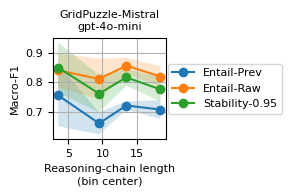

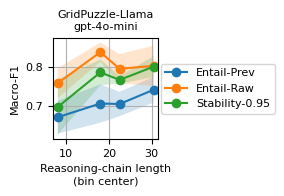

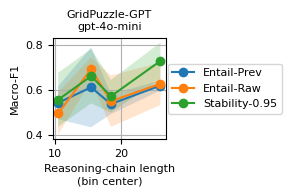

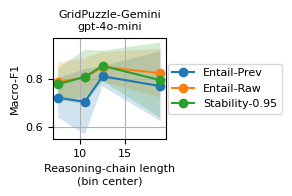

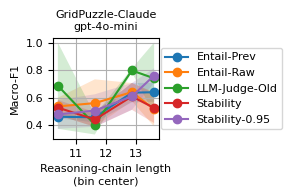

In [60]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os

for filename in filenames:

    dataset_name, model_name = filename.split('.')[0], filename.split('.')[1]
    if len(filename.split('.')) > 2:
        suffix = '.' + filename.split('.')[2]
    else:
        suffix = ''

    with open(os.path.join(load_dir, filename)) as input_file:
        results = json.load(input_file)

    bin_edges         = results['bin_edges']
    metrics_bin_cv    = results['metrics_bin_cv']
    # dataset_name_map  = results['dataset_name_map']
    # dataset_name      = results['dataset_name']
    # model_name        = results['model_name']
    # load_dir          = results['load_dir']

    # 4. PLOT MACRO-F1 vs. CHAIN-LENGTH BIN WITH STD FILL & OUTSIDE LEGEND
    # ----------------------------------------------------------------------
    num_bins   = len(metrics_bin_cv[list(metrics_bin_cv.keys())[0]])
    names_use  = list(metrics_bin_cv.keys())
    bin_centers = [(bin_edges[i] + bin_edges[i + 1]) / 2
                   for i in range(num_bins)]

    fig, ax = plt.subplots(figsize=(4, 2))
    for name in names_use:
        means = [np.nanmean(metrics_bin_cv[name][str(b)])
                 for b in range(num_bins)]
        stds  = [np.nanstd(metrics_bin_cv[name][str(b)])
                 for b in range(num_bins)]

        ax.plot(bin_centers, means, marker="o", label=name)
        lower = np.array(means) - np.array(stds)
        upper = np.array(means) + np.array(stds)
        ax.fill_between(bin_centers, lower, upper, alpha=0.2)

    ax.set_xlabel("Reasoning-chain length\n(bin center)")
    ax.set_ylabel("Macro-F1")
    ax.set_title(f"{dataset_name_map[dataset_name]}\n{model_name}")
    ax.grid(True)

    # move legend outside on the right
    ax.legend(
        loc='center left',                # anchor the legend's location
        bbox_to_anchor=(1.02, 0.5),       # place it just outside the axes
        borderaxespad=0                   # no padding between axes and legend
    )

    # adjust layout so nothing is clipped
    plt.tight_layout(rect=(0, 0, 0.75, 1))  # leave right margin free for legend

    # save including the legend
    plt.savefig(
        os.path.join(
            load_dir,
            f'{dataset_name_map[dataset_name]}.{model_name}{suffix}.lengths.pdf'),
        dpi=300, bbox_inches='tight', pad_inches=0.1
    )
    plt.show()


['DejaVu Sans',
 'Bitstream Vera Sans',
 'Computer Modern Sans Serif',
 'Lucida Grande',
 'Verdana',
 'Geneva',
 'Lucid',
 'Arial',
 'Helvetica',
 'Avant Garde',
 'sans-serif']

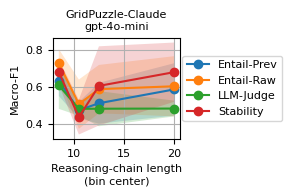